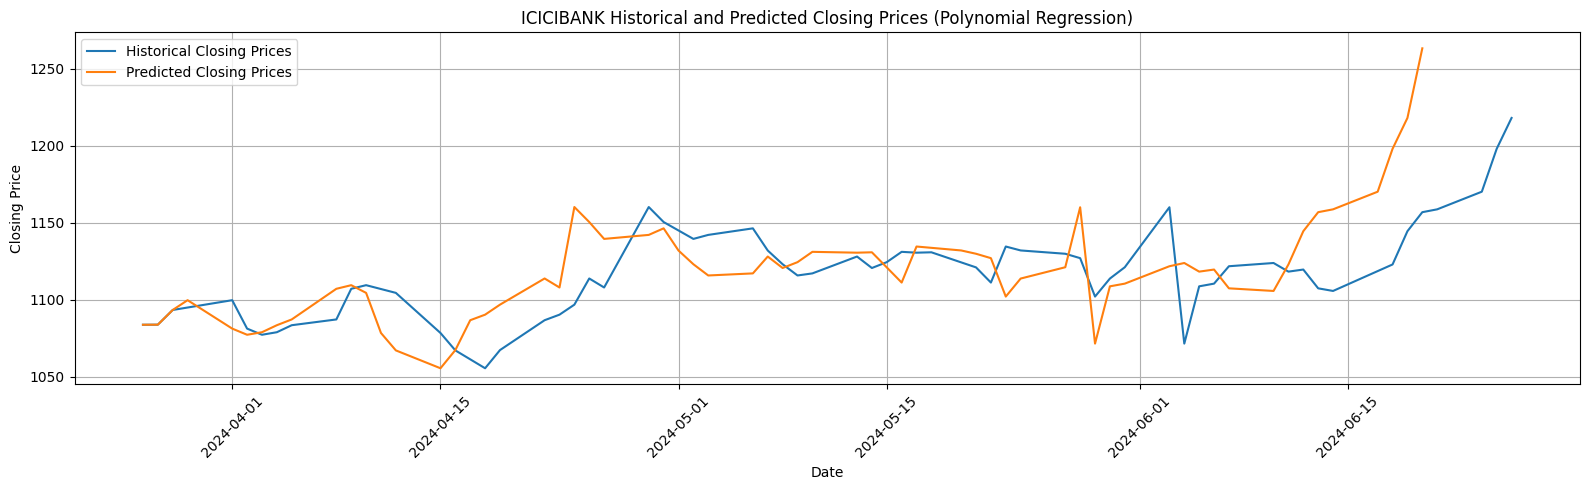

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import uuid
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Function to check and convert values to float
def convert_to_float(value):
    try:
        # Remove commas and convert to float
        return float(value.replace(',', ''))
    except ValueError:
        # Handle any non-numeric values gracefully
        return np.nan
    
script = 'ICICIBANK'
fileName = 'Quote-Equity-ICICIBANK-EQ-26-03-2024-to-26-06-2024'

uid = uuid.uuid4()
output_file_path = f'C:\\Raghav Proj\\StockFinder\\{script}_{uid}.png'

# Load data from Excel file
file_path = f'C:\\Raghav Proj\\StockFinder\\{fileName}.csv'  # Update with the actual path to your Excel file
df = pd.read_csv(file_path)

# Ensure the Date column is in datetime format
df['Date '] = pd.to_datetime(df['Date '], format='%d-%b-%Y')

# Preprocess the 'Close' column
#df['close '] = df['close '].str.replace(',', '').astype(float)

# Apply the conversion function to the 'Close' column
df['close '] = df['close '].apply(convert_to_float)

# Sort data by date
df = df.sort_values(by='Date ')

# Extract the 'Date' and 'Close' columns
dates = df['Date ']
closing_prices = df['close ']

# Prepare the data for the Linear Regression model
X = np.array(range(len(dates))).reshape(-1, 1)
y = closing_prices.values

# Define Polynomial Regression model pipeline
degree = 7  # Adjust the degree of the polynomial as needed
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(X, y)

# Predict future values
# future_days = 5
# X_future = np.array(range(len(dates), len(dates) + future_days)).reshape(-1, 1)
# y_future = model.predict(X_future)

# Predict future values
future_days = 1
X_future = np.array(range(len(dates), len(dates) + future_days)).reshape(-1, 1)
y_future = model.predict(X_future)

# Plotting the data and predictions
plt.figure(figsize=(16, 5))
plt.plot(dates, closing_prices, label='Historical Closing Prices')
plt.plot(pd.date_range(dates.iloc[0], periods=len(dates) + future_days, freq='B'), np.concatenate([y, y_future]), label='Predicted Closing Prices', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(script +' Historical and Predicted Closing Prices (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig(output_file_path, format='png')
# Show the plot
plt.show()


#Normal predection ###################################
# Fit the Linear Regression model
# model = LinearRegression()
# model.fit(X, y)

# # Predict future values
# future_days = 5
# X_future = np.array(range(len(dates) + future_days)).reshape(-1, 1)
# y_future = model.predict(X_future)

# Plotting the data
# plt.figure(figsize=(10, 6))
# plt.plot(dates, closing_prices, label='Historical Closing Prices')
# plt.plot(pd.date_range(dates.iloc[0], periods=len(dates) + future_days, freq='B'), y_future, label='Predicted Closing Prices', linestyle='--')

# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.title( script +' Historical and Predicted Closing Prices')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Save the plot as a PNG file
# plt.savefig(output_file_path, format='png')

# # Show the plot
# plt.show()


Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV.CLOSE', 'ltp', 'close',
       'vwap', '52WH', '52WL', 'VOLUME', 'VALUE', 'Nooftrades'],
      dtype='object')
Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV.CLOSE', 'ltp', 'close',
       'vwap', '52WH', '52WL', 'VOLUME', 'VALUE', 'Nooftrades'],
      dtype='object')


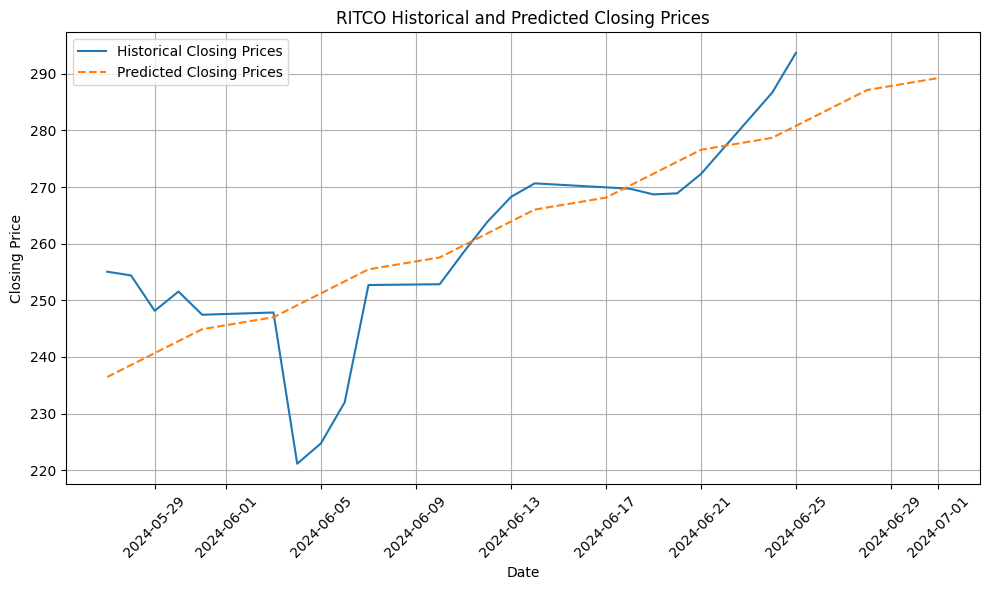

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

scriptName = "RITCO"
# Load data from Excel file
file_path = r'C:\Raghav Proj\StockFinder\Quote-Equity-RITCO-EQ-25-05-2024-to-25-06-2024.csv'  # Update with the actual path to your Excel file
df = pd.read_csv(file_path)

# Print the columns to verify names
print(df.columns)
print(df.columns)

# Ensure the Date column is in datetime format (adjust column name as necessary)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Sort data by date
df = df.sort_values(by='Date')

# Extract the 'Date' and 'close' columns (adjust column names as necessary)
dates = df['Date']
closing_prices = df['close']

# Prepare the data for the Linear Regression model
X = np.array(range(len(dates))).reshape(-1, 1)
y = closing_prices.values

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values
future_days = 5
X_future = np.array(range(len(dates) + future_days)).reshape(-1, 1)
y_future = model.predict(X_future)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices, label='Historical Closing Prices')
plt.plot(pd.date_range(dates.iloc[0], periods=len(dates) + future_days, freq='B'), y_future, label='Predicted Closing Prices', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(scriptName +' Historical and Predicted Closing Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
